In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import ml_metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
!dir

 ’®¬ ў гбва®©бвўҐ C ­Ґ Ё¬ҐҐв ¬ҐвЄЁ.
 ‘ҐаЁ©­л© ­®¬Ґа в®¬ : 7496-5BB4

 ‘®¤Ґа¦Ё¬®Ґ Ї ЇЄЁ C:\projects\LP_DS_project

27.10.2020  19:31    <DIR>          .
27.10.2020  19:31    <DIR>          ..
27.10.2020  19:31    <DIR>          .ipynb_checkpoints
27.10.2020  18:44           116я198 AFKS.csv
27.10.2020  06:33    <DIR>          env
27.10.2020  19:31            12я875 Filling data.ipynb
27.10.2020  18:44           116я505 GAZP.csv
27.10.2020  19:04           430я192 Gazprom.ipynb
27.10.2020  18:44           417я252 Grafic_akcii.ipynb
27.10.2020  19:15           394я043 Kamaz.ipynb
27.10.2020  18:44           108я755 KMAZ.csv
27.10.2020  18:44           183я007 qAFKS.csv
27.10.2020  18:44           190я932 qGAZP.csv
27.10.2020  19:10           180я626 qKMAZ.csv
27.10.2020  19:16           186я527 qSBER.csv
27.10.2020  19:30           192я537 qTATN.csv
27.10.2020  18:44           113я422 SBER.csv
27.10.2020  19:19           416я646 Sber.ipynb
27.10.2020  18:44           117я504 TATN.csv
27.1

In [3]:
dataset = pd.read_csv('qTATN.csv', sep=';')
dataset

,Unnamed: 0,Unnamed: 0.1,COMPANY,DATE,OPEN,CLOSE
0,0,99448,TATN,2008-01-10,155.00,153.50
1,1,99449,TATN,2008-01-11,153.60,154.22
2,2,99449,TATN,2008-01-12,153.60,154.22
3,3,99449,TATN,2008-01-13,153.60,154.22
4,4,99450,TATN,2008-01-14,154.06,158.50
...,...,...,...,...,...,...
4643,4643,102649,TATN,2020-09-26,463.30,464.00
4644,4644,102649,TATN,2020-09-27,463.30,464.00
4645,4645,102650,TATN,2020-09-28,464.60,473.60
4646,4646,102651,TATN,2020-09-29,473.60,465.80


In [4]:
dataset['DATE']

0       2008-01-10
1       2008-01-11
2       2008-01-12
3       2008-01-13
4       2008-01-14
           ...    
4643    2020-09-26
4644    2020-09-27
4645    2020-09-28
4646    2020-09-29
4647    2020-09-30
Name: DATE, Length: 4648, dtype: object

In [5]:
dataset = pd.read_csv('qTATN.csv', ';', index_col=['DATE'], parse_dates=['DATE'], dayfirst=True)

In [6]:
dataset2 = dataset
dataset2

,Unnamed: 0,Unnamed: 0.1,COMPANY,OPEN,CLOSE
DATE,,,,,
2008-01-10,0,99448,TATN,155.00,153.50
2008-01-11,1,99449,TATN,153.60,154.22
2008-01-12,2,99449,TATN,153.60,154.22
2008-01-13,3,99449,TATN,153.60,154.22
2008-01-14,4,99450,TATN,154.06,158.50
...,...,...,...,...,...
2020-09-26,4643,102649,TATN,463.30,464.00
2020-09-27,4644,102649,TATN,463.30,464.00
2020-09-28,4645,102650,TATN,464.60,473.60


In [7]:
#Оставлю эту ячейку здесь
#dataset2 = dataset2[(dataset2['DATE'] > '2014-01-01') & (dataset2['DATE'] < '2020-09-30')]
#dataset2

## Избавляемся от ненужных столбцов

In [8]:
dataset2 = dataset2.drop(['COMPANY'], axis=1)

In [9]:
dataset2 = dataset2.drop(['CLOSE'], axis=1)

In [10]:
dataset2 = dataset2.drop(['Unnamed: 0'], axis=1)

In [11]:
dataset2 = dataset2.drop(['Unnamed: 0.1'], axis=1)

In [12]:
dataset2

,OPEN
DATE,
2008-01-10,155.00
2008-01-11,153.60
2008-01-12,153.60
2008-01-13,153.60
2008-01-14,154.06
...,...
2020-09-26,463.30
2020-09-27,463.30
2020-09-28,464.60


# Строим график

In [13]:
dtst = dataset2

<AxesSubplot:xlabel='DATE'>

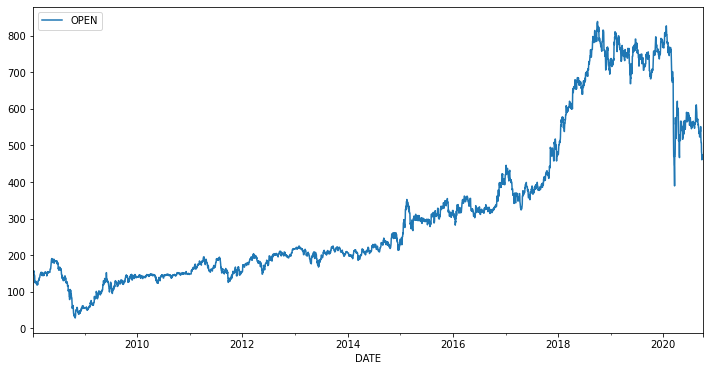

In [14]:
dtst.plot(figsize=(12,6))

### Данные с недельным интервалом

<AxesSubplot:xlabel='DATE'>

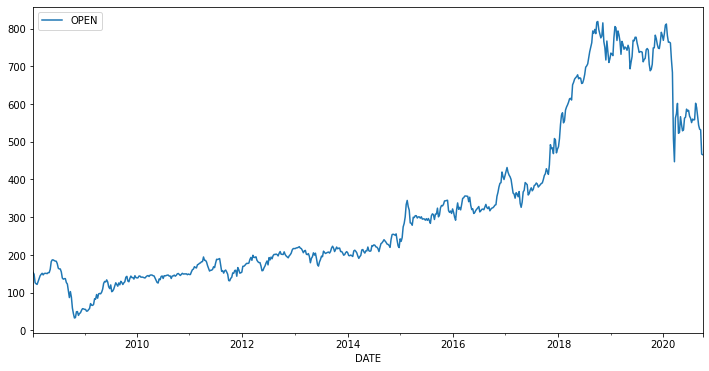

In [15]:
dtstw = dtst.resample('W').median()
dtstw.plot(figsize=(12,6))

In [16]:
dtstw

,OPEN
DATE,
2008-01-13,153.6
2008-01-20,149.0
2008-01-27,126.5
2008-02-03,123.7
2008-02-10,122.0
...,...
2020-09-06,543.6
2020-09-13,533.3
2020-09-20,531.6


In [17]:
dtstw.to_csv('week_qTATN.csv', sep=';')

### Гистограмма с полными данными

,OPEN
count,4648.000000
mean,320.623819
std,214.293071
min,27.940000
25%,158.805000
50%,219.000000
75%,400.000000
max,839.200000


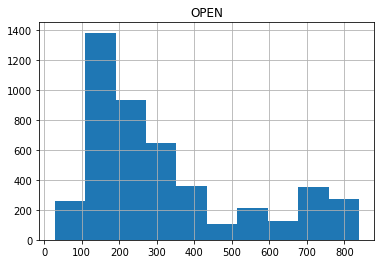

In [18]:
idtst = dtst.describe()
dtst.hist()
idtst

### Гистограмма с недельным интервалом

,OPEN
count,665.000000
mean,320.881669
std,214.519323
min,33.080000
25%,159.070000
50%,219.000000
75%,400.000000
max,818.700000


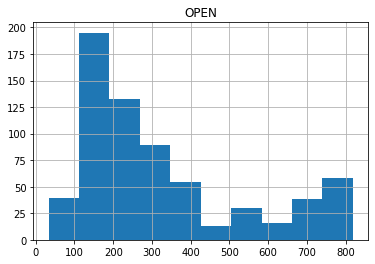

In [19]:
idtstw = dtstw.describe()
dtstw.hist()
idtstw

# Расчет коэффициента вариации

### Полные данные

In [20]:
V = idtst.loc['std']/idtst.loc['mean']

In [21]:
V

OPEN    0.668363
dtype: float64

### Недельные данные

In [22]:
Vw = idtstw.loc['std']/idtstw.loc['mean']

In [23]:
Vw

OPEN    0.668531
dtype: float64

# Тест Харки-Бера

### Полные данные

In [24]:
row =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_test = sm.stats.stattools.jarque_bera(dtst, axis=1)
jb_test

(array([0.375, 0.375, 0.375, ..., 0.375, 0.375, 0.375]),
 array([0.82902912, 0.82902912, 0.82902912, ..., 0.82902912, 0.82902912,
        0.82902912]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [25]:
a = np.vstack([jb_test])
a

array([[0.375     , 0.375     , 0.375     , ..., 0.375     , 0.375     ,
        0.375     ],
       [0.82902912, 0.82902912, 0.82902912, ..., 0.82902912, 0.82902912,
        0.82902912],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [26]:
idtst = SimpleTable(a, row)
idtst

JB,p-value,skew,kurtosis
0.375,0.375,0.375,0.375
0.8290291181804004,0.8290291181804004,0.8290291181804004,0.8290291181804004
0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0


### Недельные данные


In [27]:
roww =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_testw = sm.stats.stattools.jarque_bera(dtstw, axis=1)
jb_testw

(array([0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
      

In [28]:
aw = np.vstack([jb_testw])
aw

array([[0.375     , 0.375     , 0.375     , ..., 0.375     , 0.375     ,
        0.375     ],
       [0.82902912, 0.82902912, 0.82902912, ..., 0.82902912, 0.82902912,
        0.82902912],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [29]:
idtstw = SimpleTable(aw, roww)
idtstw

JB,p-value,skew,kurtosis
0.375,0.375,0.375,0.375
0.8290291181804004,0.8290291181804004,0.8290291181804004,0.8290291181804004
0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0


### Тест Дикки-Фуллера

### Полные данные

In [30]:
dtst2 = dtst.dropna(how='any')

In [31]:
dtst2

,OPEN
DATE,
2008-01-10,155.00
2008-01-11,153.60
2008-01-12,153.60
2008-01-13,153.60
2008-01-14,154.06
...,...
2020-09-26,463.30
2020-09-27,463.30
2020-09-28,464.60


In [32]:
test = sm.tsa.adfuller(dtst2)

In [33]:
test_result = [{'adf: ': test[0], 'p-value: ': test[1], 'Critical values: ': test[4]}]
test_result = pd.DataFrame(test_result)
if test[0] > test[4]['5%']:
    test_result[3] = 'есть единичные корни, ряд не стационарен'
else: 
    test_result[3] = 'единичных корней нет, ряд стационарен'

In [34]:
test_result

,adf:,p-value:,Critical values:,3
0,-0.954784,0.769397,"{'1%': -3.4317668338310092, '5%': -2.862166075...","есть единичные корни, ряд не стационарен"


### Недельные данные

In [35]:
dtst2w = dtstw.dropna(how='any')

In [36]:
dtst2w

,OPEN
DATE,
2008-01-13,153.6
2008-01-20,149.0
2008-01-27,126.5
2008-02-03,123.7
2008-02-10,122.0
...,...
2020-09-06,543.6
2020-09-13,533.3
2020-09-20,531.6


In [37]:
testw = sm.tsa.adfuller(dtst2w)

In [38]:
test_resultw = [{'adf: ': test[0], 'p-value: ': testw[1], 'Critical values: ': test[4]}]
test_resultw = pd.DataFrame(test_resultw)
if testw[0] > testw[4]['5%']:
    test_resultw[3] = 'есть единичные корни, ряд не стационарен'
else: 
    test_resultw[3] = 'единичных корней нет, ряд стационарен'

In [39]:
test_resultw

,adf:,p-value:,Critical values:,3
0,-0.954784,0.772473,"{'1%': -3.4317668338310092, '5%': -2.862166075...","есть единичные корни, ряд не стационарен"


### Проверка порядка интегрированного ряда

### Полные данные

In [40]:
dtst2diff = dtst.diff(periods=1).dropna()

In [41]:
test2 = sm.tsa.adfuller(dtst2diff)

In [42]:
test_result2 = [{'adf: ': test2[0], 'p-value: ': test2[1], 'Critical values: ': test2[4]}]
test_result2 = pd.DataFrame(test_result2)
if test2[0] > test2[4]['5%']:
    test_result2[3] = 'есть единичные корни, ряд не стационарен'
else: 
    test_result2[3] = 'единичных корней нет, ряд стационарен'

In [43]:
test_result2

,adf:,p-value:,Critical values:,3
0,-13.81067,8.242775e-26,"{'1%': -3.4317668338310092, '5%': -2.862166075...","единичных корней нет, ряд стационарен"


### Недельные данные

In [44]:
dtst2diffw = dtstw.diff(periods=1).dropna()

In [45]:
test2w = sm.tsa.adfuller(dtst2diffw)

In [46]:
test_result2w = [{'adf: ': test2w[0], 'p-value: ': test2w[1], 'Critical values: ': test2w[4]}]
test_result2w = pd.DataFrame(test_result2w)
if test2w[0] > test2w[4]['5%']:
    test_result2w[3] = 'есть единичные корни, ряд не стационарен'
else: 
    test_result2w[3] = 'единичных корней нет, ряд стационарен'

In [47]:
test_result2w

,adf:,p-value:,Critical values:,3
0,-10.673771,4.103369e-19,"{'1%': -3.4403271946832645, '5%': -2.865942472...","единичных корней нет, ряд стационарен"


### Проверка мат ожидания

In [48]:
#dt2diff.index[len(dt2diff.index)/3]

In [49]:
#m = dt2diff.index[len(dt2diff.index)/2+1]

In [50]:
"""r1 = sm.stats.DescrStatsW(dt2diff[m:])
r2 = sm.stats.DescrStatsW(dt2diff[:m])
prov = sm.stats.CompareMeans(r1,r2).ttest_ind()[1]
prov"""

'r1 = sm.stats.DescrStatsW(dt2diff[m:])\nr2 = sm.stats.DescrStatsW(dt2diff[:m])\nprov = sm.stats.CompareMeans(r1,r2).ttest_ind()[1]\nprov'

### Полные данные

<AxesSubplot:xlabel='DATE'>

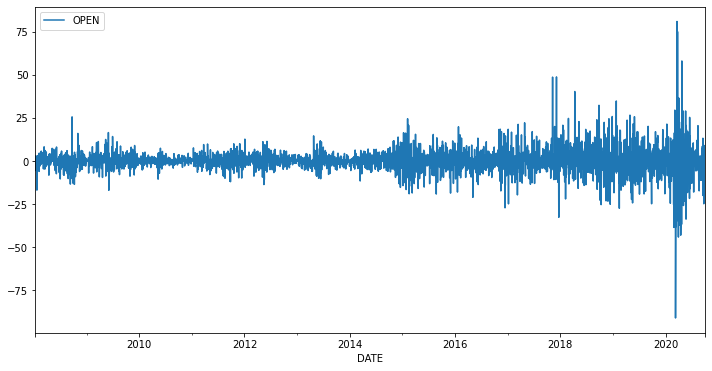

In [51]:
dtst2diff.plot(figsize=(12,6))

<Figure size 864x576 with 0 Axes>

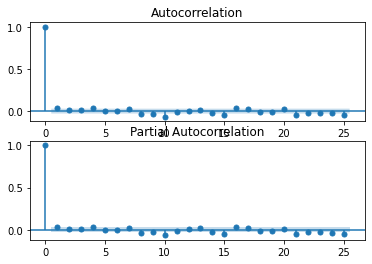

In [52]:
ig = plt.figure(figsize=(12,8))
fig = plt.figure() #добавил эту строку,так как без неё не запускается ячейка
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dtst2diff.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dtst2diff, lags=25, ax=ax2)

### Недельные данные

<AxesSubplot:xlabel='DATE'>

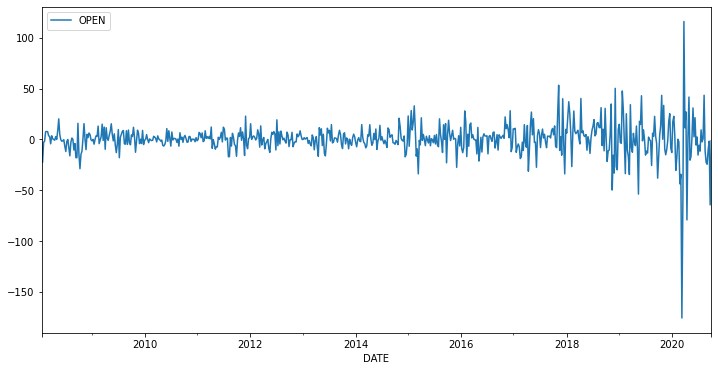

In [53]:
dtst2diffw.plot(figsize=(12,6))

<Figure size 864x576 with 0 Axes>

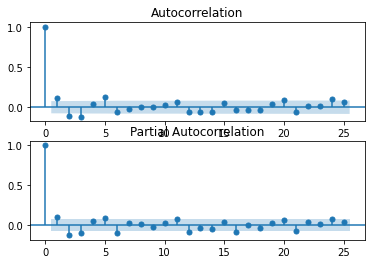

In [54]:
igw = plt.figure(figsize=(12,8))
fig = plt.figure() #добавил эту строку,так как без неё не запускается ячейка
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dtst2diffw.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dtst2diffw, lags=25, ax=ax2)

После изучения коррелограммы PACF можно сделать вывод, что p = 1, т.к. на ней только 1 лаг сильно отличнен от нуля. По коррелограмме ACF можно увидеть, что q = 1, т.к. после лага 1 значении функций резко падают

### Построение ARIMA модели

### Недельные данные

In [55]:
src_data_modelw = dtstw['2020-01-01':'2020-09-29']
modelw =  sm.tsa.arima.ARIMA(src_data_modelw, order=(1,1,1), freq='W').fit()
# в методе fit() пришлось удалить все параметры, так как они не подходят 
#(нет в документации)

In [56]:
modelw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   OPEN   No. Observations:                   39
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -194.320
Date:                Tue, 27 Oct 2020   AIC                            394.640
Time:                        19:32:49   BIC                            399.553
Sample:                    01-05-2020   HQIC                           396.388
                         - 09-27-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6113      0.254     -2.409      0.016      -1.109      -0.114
ma.L1          0.9986     11.433      0.087      0.930     -21.409      23.406
sigma2      1525.2788   1.72e+04      0.089      0.929   -3.22e+04    3.52e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               107.77
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.18   Skew:                            -1.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Полные данные (модель не строится)

In [57]:
src_data_model = dtst['2014-01-01':'2020-09-30']
model =  sm.tsa.arima.ARIMA(src_data_model, order=(1,1,1), freq='D').fit()
# в методе fit() пришлось удалить все параметры, так как они не подходят 
#(нет в документации)

c:\projects\ds_lessons\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   OPEN   No. Observations:                 2465
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8648.677
Date:                Tue, 27 Oct 2020   AIC                          17303.355
Time:                        19:32:49   BIC                          17320.783
Sample:                    01-01-2014   HQIC                         17309.687
                         - 09-30-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5651      0.169      3.345      0.001       0.234       0.896
ma.L1         -0.5236      0.176     -2.979      0.003      -0.868      -0.179
sigma2        65.5075      0.589    111.134      0.000      64.352      66.663
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             36874.77
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               5.09   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Q-тест Льюинга-Бокса

In [59]:
type(model.resid)

pandas.core.series.Series

In [60]:
q_test = sm.tsa.stattools.acf(model.resid, qstat=True)

c:\projects\ds_lessons\env\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
c:\projects\ds_lessons\env\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [61]:
q_test

(array([ 1.00000000e+00,  3.06340506e-03, -1.21375239e-02,  9.61572269e-04,
         2.30383452e-02, -7.49155384e-03, -1.65951117e-05,  2.11653054e-02,
        -3.62600983e-02, -2.42927275e-02, -5.74427388e-02, -9.82949872e-03,
         1.35909511e-02,  1.44431030e-02, -3.04018935e-02, -4.70171489e-02,
         3.20497004e-02,  1.92317955e-02, -3.79641998e-03, -3.94458971e-03,
         2.24218572e-02, -4.75251265e-02, -1.92056124e-02, -1.24208326e-02,
        -2.30657125e-02, -3.95198698e-02, -5.99999436e-03, -3.42592291e-02,
         1.80159607e-02,  4.87957556e-02,  8.09282106e-03,  1.17312364e-02,
        -1.11610964e-03,  1.32510579e-02,  1.88718349e-02, -3.66775663e-03,
         4.23954125e-02,  1.79045252e-02, -8.08662560e-03, -2.95018516e-03,
         3.53833643e-02]),
 array([2.31608354e-02, 3.86893127e-01, 3.89176947e-01, 1.70070330e+00,
        1.83944109e+00, 1.83944177e+00, 2.94773142e+00, 6.20189117e+00,
        7.66309321e+00, 1.58365327e+01, 1.60759604e+01, 1.65338789e+0

In [62]:
pd.DataFrame({'Q-stat':q_test[1], 'p-value':q_test[2]})

,Q-stat,p-value
0,0.023161,0.879040
1,0.386893,0.824114
2,0.389177,0.942469
3,1.700703,0.790590
4,1.839441,0.870885
5,1.839442,0.933857
6,2.947731,0.889795
7,6.201891,0.624628
8,7.663093,0.568422
9,15.836533,0.104408


### Рассчет коэффициента детерминации

In [63]:
pred = model.predict('2020-09-30','2020-10-15', typ='levels')

In [64]:
trn = dtst['2020-09-15':]

In [65]:
trn.shape

(16, 1)

In [66]:
pred.shape

(16,)

In [67]:
pred

2020-09-30    473.953363
2020-10-01    465.661452
2020-10-02    465.583159
2020-10-03    465.538914
2020-10-04    465.513911
2020-10-05    465.499782
2020-10-06    465.491798
2020-10-07    465.487286
2020-10-08    465.484736
2020-10-09    465.483295
2020-10-10    465.482481
2020-10-11    465.482021
2020-10-12    465.481761
2020-10-13    465.481614
2020-10-14    465.481531
2020-10-15    465.481484
Freq: D, Name: predicted_mean, dtype: float64

In [68]:
pred = pred.to_frame()


In [69]:
pred.shape

(16, 1)

In [70]:
pred

,predicted_mean
2020-09-30,473.953363
2020-10-01,465.661452
2020-10-02,465.583159
2020-10-03,465.538914
2020-10-04,465.513911
2020-10-05,465.499782
2020-10-06,465.491798
2020-10-07,465.487286
2020-10-08,465.484736
2020-10-09,465.483295


In [71]:
pred.rename(columns={'predicted_mean': 'OPEN'}, inplace=True)

In [72]:
trn

,OPEN
DATE,
2020-09-15,538.4
2020-09-16,551.6
2020-09-17,531.6
2020-09-18,517.1
2020-09-19,507.9
2020-09-20,507.9
2020-09-21,506.7
2020-09-22,481.9
2020-09-23,479.1


In [73]:
r2 = r2_score(trn, pred)

In [74]:
r2

-0.755657617628607

In [75]:
metrics.rmse(trn,pred)

39.05444278228883

In [76]:
metrics.mae(trn,pred)

27.7542995720001

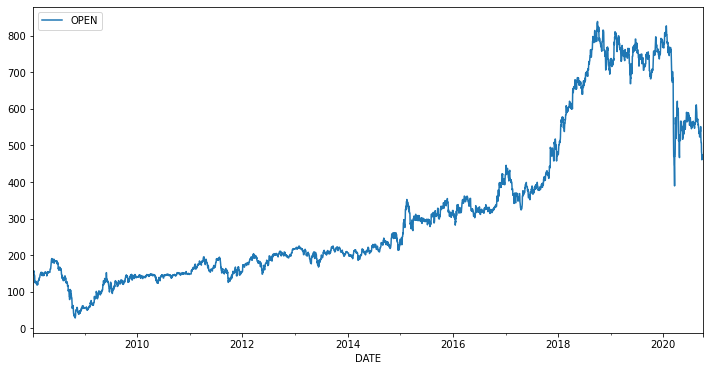

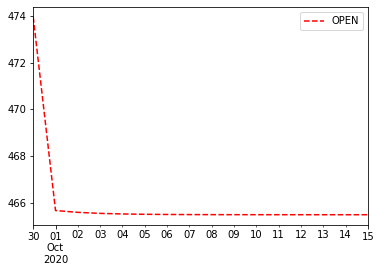

In [77]:
dtst.plot(figsize=(12,6))
pred.plot(style='r--')
plt.show()

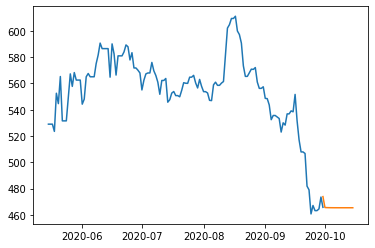

In [78]:
plt.plot(dtst['2020-05-15':])
plt.plot(pred)
plt.show()